In [4]:
#|default_exp app

In [5]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper() #same function as the function used in model

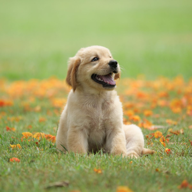

In [7]:
im = PILImage.create('dog.jpeg')
im.thumbnail((192,192))
im

In [8]:
#|export
learn = load_learner('model.pkl')

In [9]:
learn.predict(im)

('False', tensor(0), tensor([9.9988e-01, 1.1579e-04]))

In [10]:
#|export
categories = ('Dog', 'Cat')

# gradio requires a function
def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories,map(float,probs)))

In [11]:
classify_image(im)

{'Dog': 0.9998842477798462, 'Cat': 0.00011579418060136959}

In [14]:
#|export 
image = gr.inputs.Image(shape = (192,192)) #reshapes image
label = gr.outputs.Label() #not sure what this does
examples = ['dog.jpeg', 'cat.jpeg', 'dunno.jpeg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/Users/ryanlee/anaconda3/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/ryanlee/anaconda3/lib/python3.10/site-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# export

In [15]:
import nbdev
nbdev.export.nb_export('app.ipynb','./')
print('export successful')

export successful
